In [97]:
from ex2_utils import create_epanechnik_kernel, generate_responses_1, get_patch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import math
from ex1_utils import gausssmooth
from matplotlib.patches import Circle

In [379]:
def mean_shift(frame, size, position, eps=0.05):
    # Round to odd number
    kernel_size_x = int(math.ceil(size[0] / 2)) * 2 - 1
    kernel_size_y = int(math.ceil(size[1] / 2)) * 2 - 1

    # Caculate the derivatives of size of kernel
    x = np.arange(-(kernel_size_x // 2), (kernel_size_x // 2) + 1)
    y = np.arange(-(kernel_size_y // 2), (kernel_size_y // 2) + 1)
    xi_X, xi_Y = np.meshgrid(x, y)

    positions = [position]
    iter_count = 0
    while True:
        wi, _ = get_patch(frame, position, (kernel_size_x, kernel_size_y))

        # Calculate the changes in both x and y directions
        xk_X = np.sum(xi_X * wi) / np.sum(wi)
        xk_Y = np.sum(xi_Y * wi) / np.sum(wi)

        # Update the position accordingly
        position = (position[0] + xk_X, position[1] + xk_Y)
        positions.append(position)

        # Check if the algorithm converged
        if math.sqrt(xk_X ** 2 + xk_X ** 2) < eps:
            break

        # Sanity check if the algorihtm does not converge
        if iter_count >= 500:
            break

        iter_count += 1

    position = tuple(map(int, np.floor(position)))
    positions.append(position)
    return position, iter_count, positions


In [125]:
responses = generate_responses_1()
size = (13, 13)
eps = 0.1
starting_position = (40, 40)
position, iters, positions = mean_shift(responses, size, starting_position, eps)
print(position, iters)

(51, 69) 27


In [166]:
def plot_image(responses, filename):
    plt.figure(facecolor="white", figsize=(12, 12), dpi=120)
    plt.imshow(responses, cmap='gray')
    plt.axis('off')
    plt.savefig("./img/" + filename, bbox_inches='tight')
    plt.show()

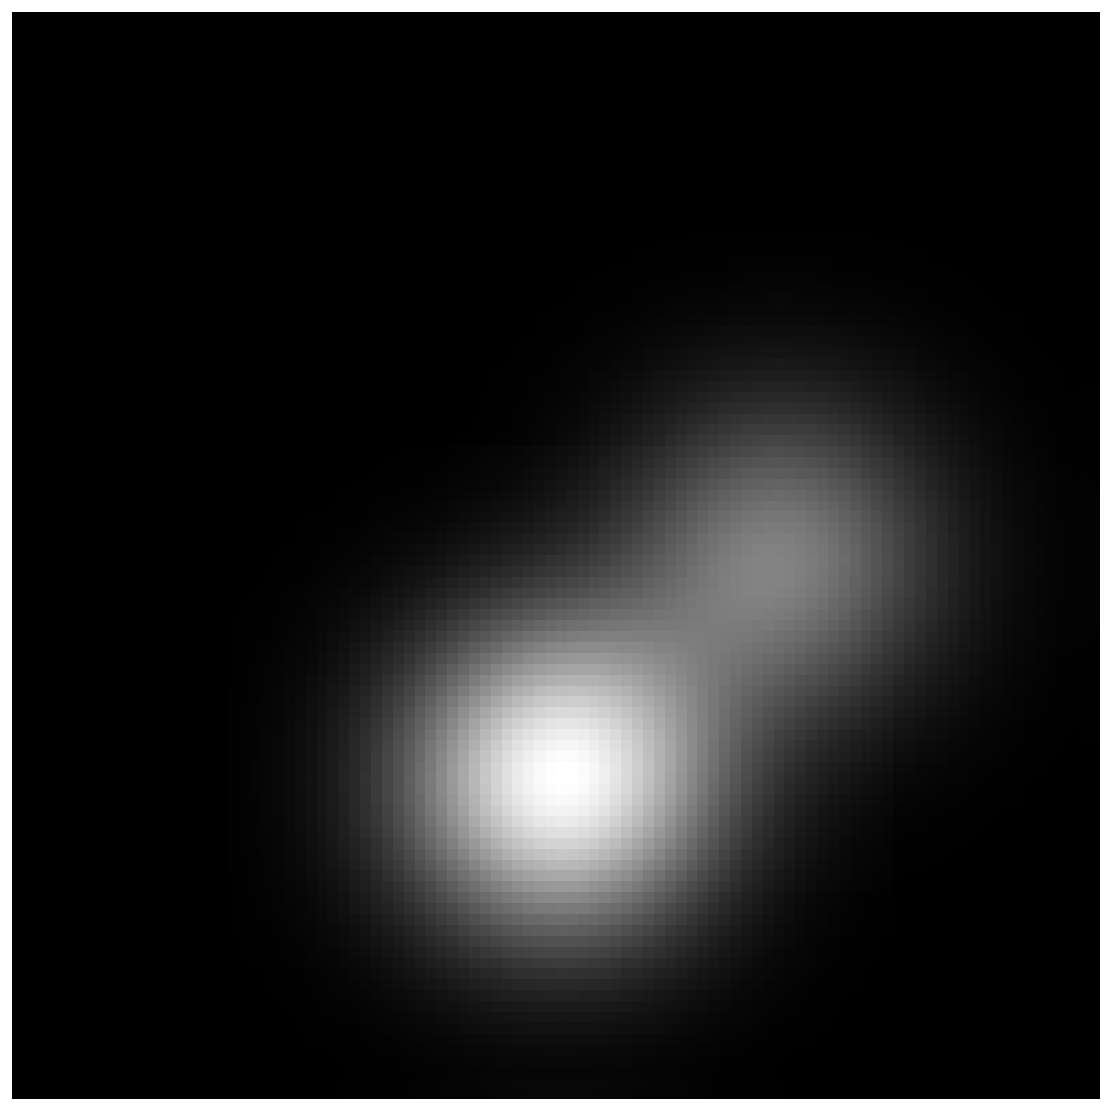

In [167]:
plot_image(responses, "responses-1.png")

In [141]:
def plot_prob_density_function(responses, filename):
    # create the x and y coordinate arrays (here we just use pixel indices)
    xx, yy = np.mgrid[0:responses.shape[0], 0:responses.shape[1]]

    # create the figure
    fig = plt.figure(facecolor="white", figsize=(12, 12), dpi=120)
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('$x$', fontsize=20)
    ax.set_ylabel('$y$', fontsize=20)
    ax.plot_surface(xx, yy, responses ,rstride=1, cstride=1, cmap=plt.cm.cool, linewidth=0)
    ax.view_init(30, 30)
    plt.savefig("./img/" + filename, bbox_inches='tight')
    plt.show()

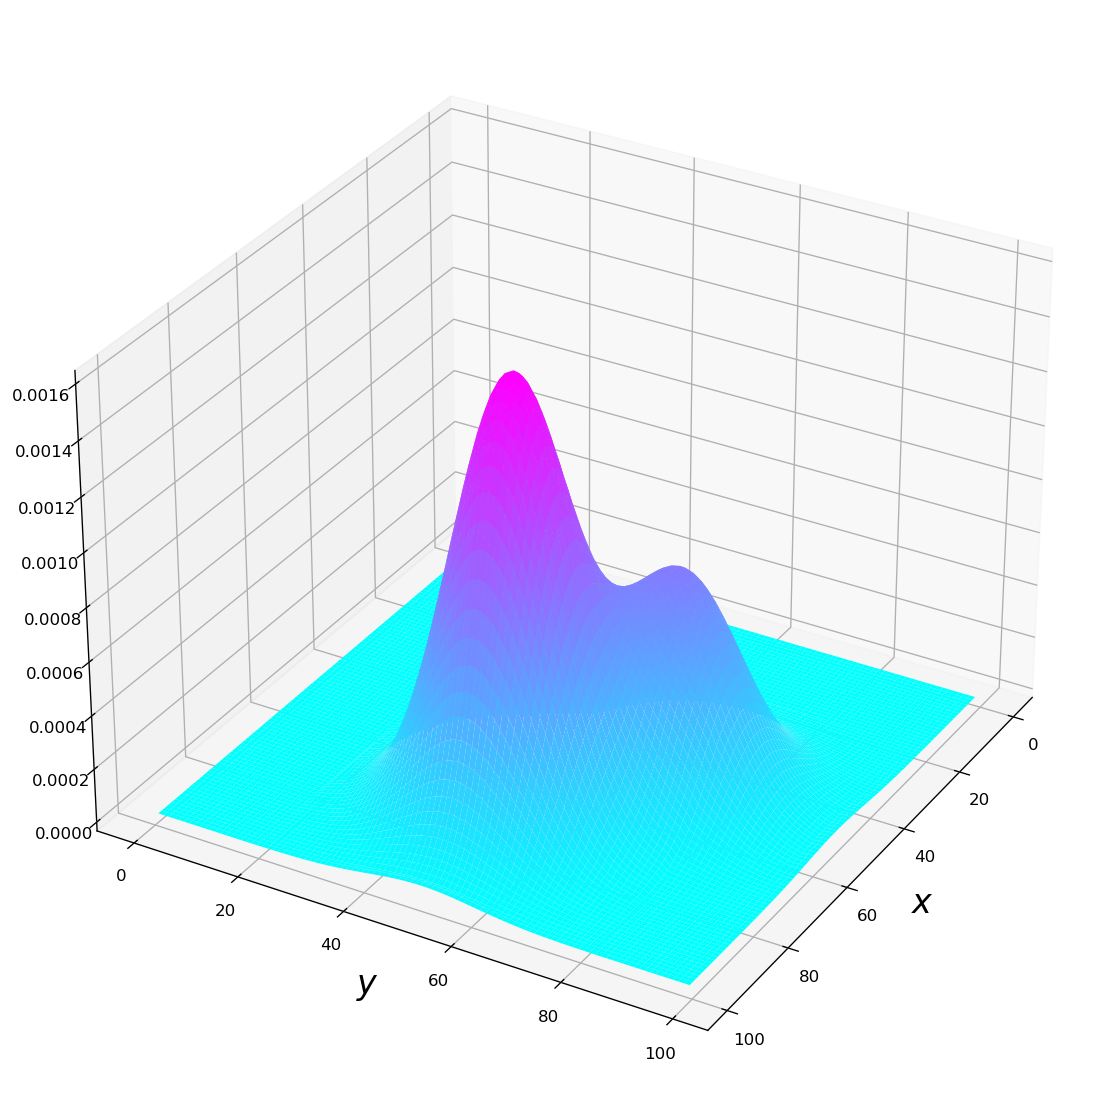

In [142]:
plot_prob_density_function(responses, "responses-1-function.png")

In [320]:
def generate_responses_2():
    responses = np.zeros((100, 100), dtype=np.float32)
    responses[30, 40] = 0.33
    responses[50, 60] = 0.66
    responses[70, 80] = 1
    return gausssmooth(responses, 10)

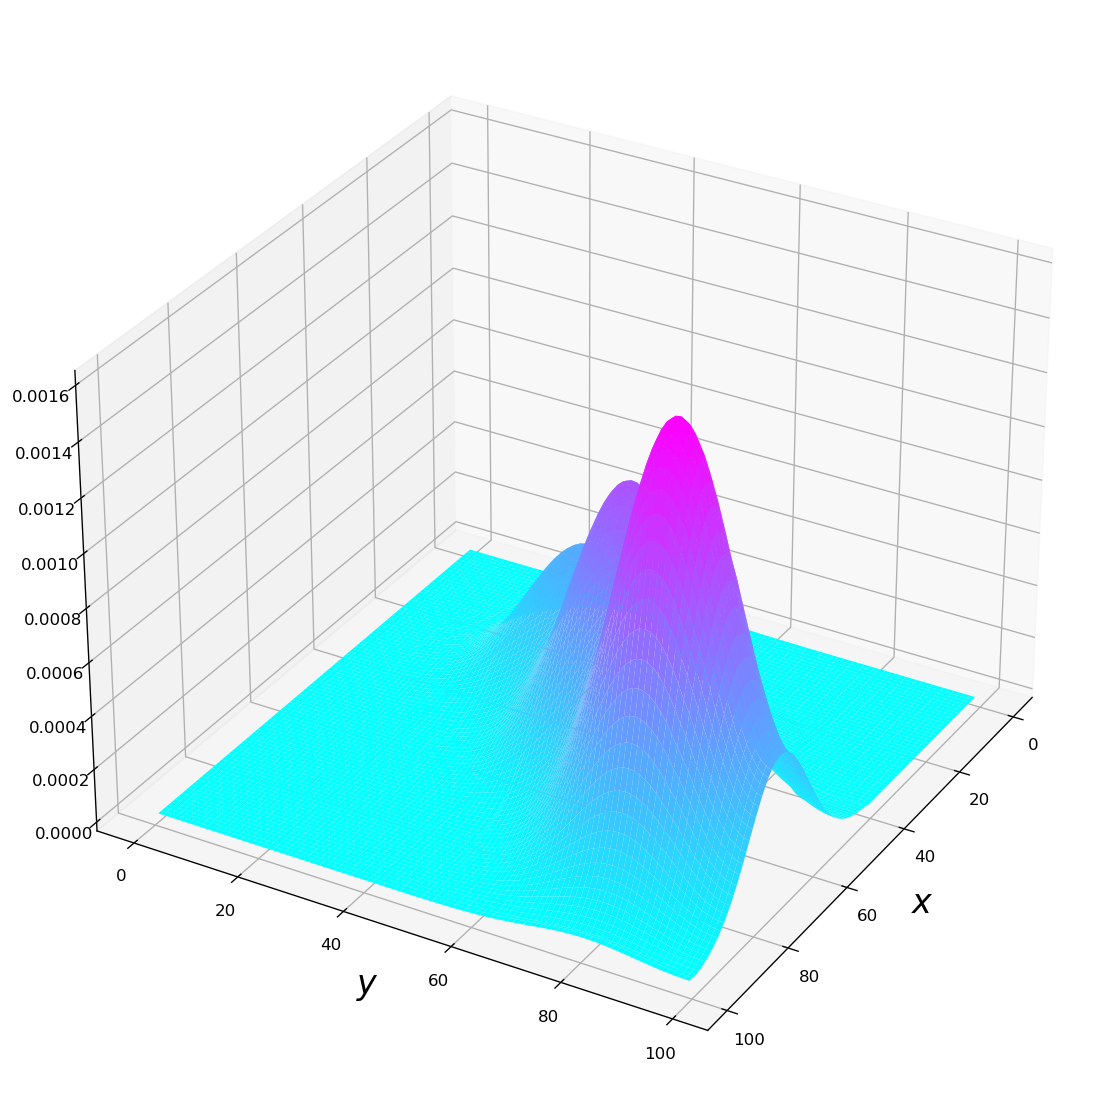

In [153]:
responses2 = generate_responses_2()
plot_prob_density_function(responses2, "responses-2-function.png")

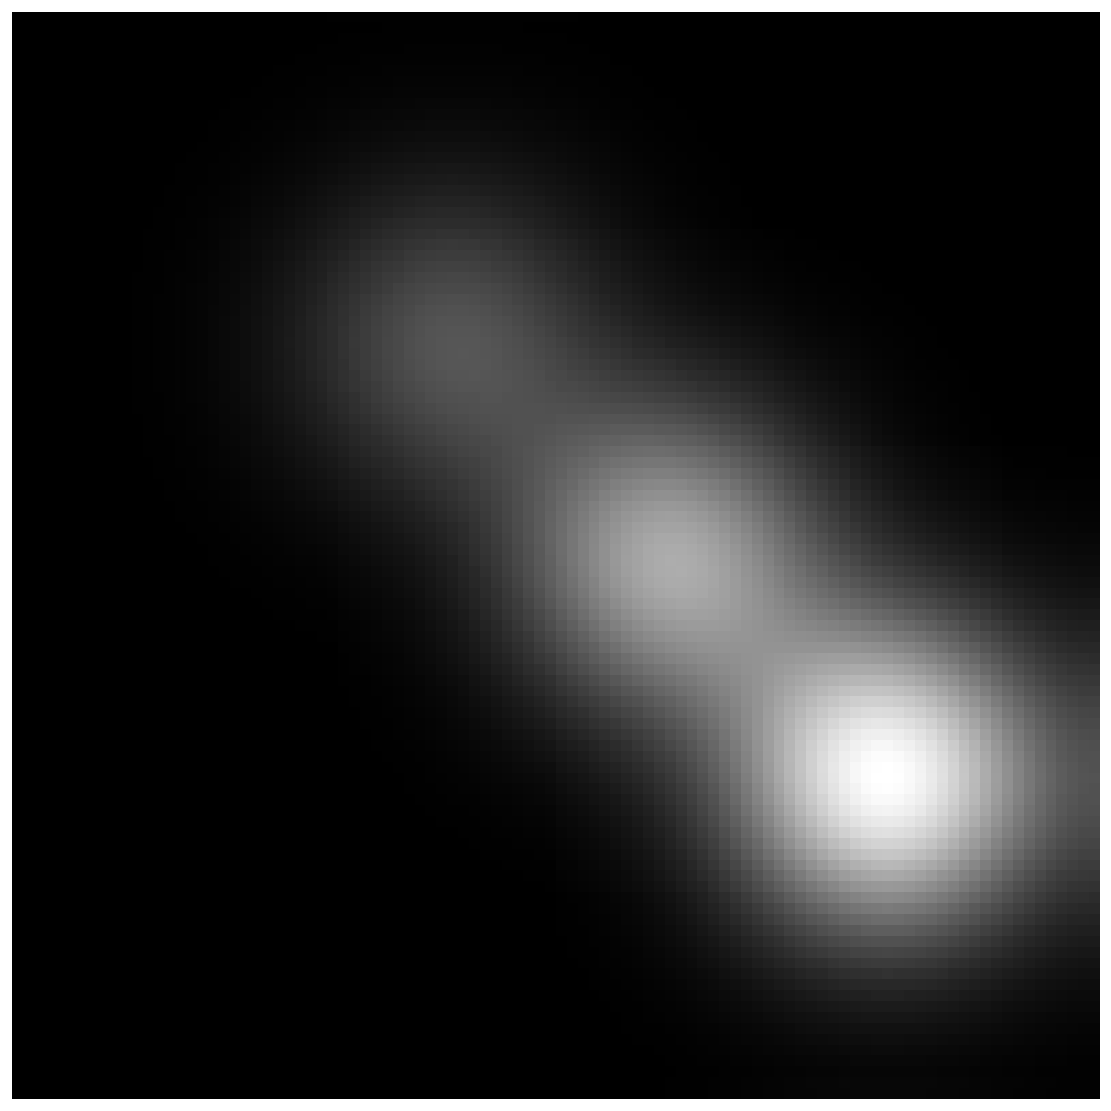

In [171]:
plot_image(responses2, "responses-2.png")

In [273]:
def plot_both(responses, filename):
    fig = plt.figure(facecolor="white", figsize=(20, 12), dpi=120)
    
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.imshow(responses, cmap='gray')
    ax1.axis('off')

    # create the x and y coordinate arrays (here we just use pixel indices)
    xx, yy = np.mgrid[0:responses.shape[0], 0:responses.shape[1]]

    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.set_xlabel('$x$', fontsize=20)
    ax2.set_ylabel('$y$', fontsize=20)
    ax2.plot_surface(xx, yy, responses ,rstride=1, cstride=1, cmap=plt.cm.cool, linewidth=0)
    ax2.view_init(30, 30)

    plt.savefig("./img/" + filename, bbox_inches='tight')
    plt.show()

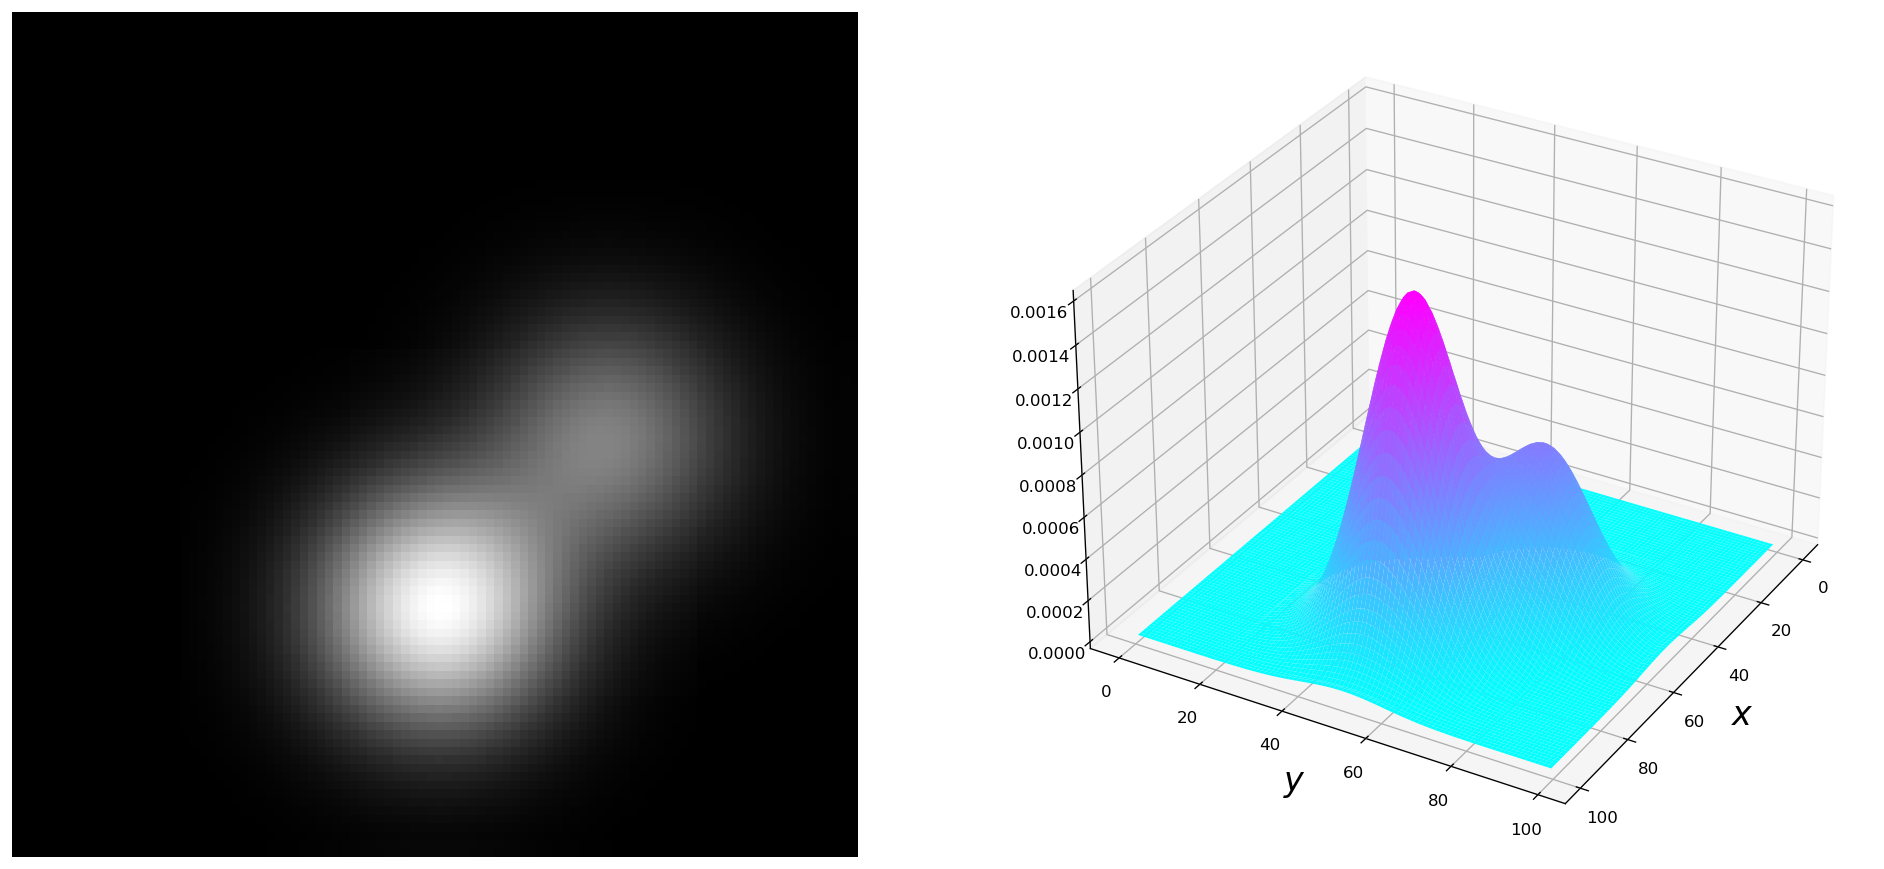

In [274]:
plot_both(responses, "both-1.png")

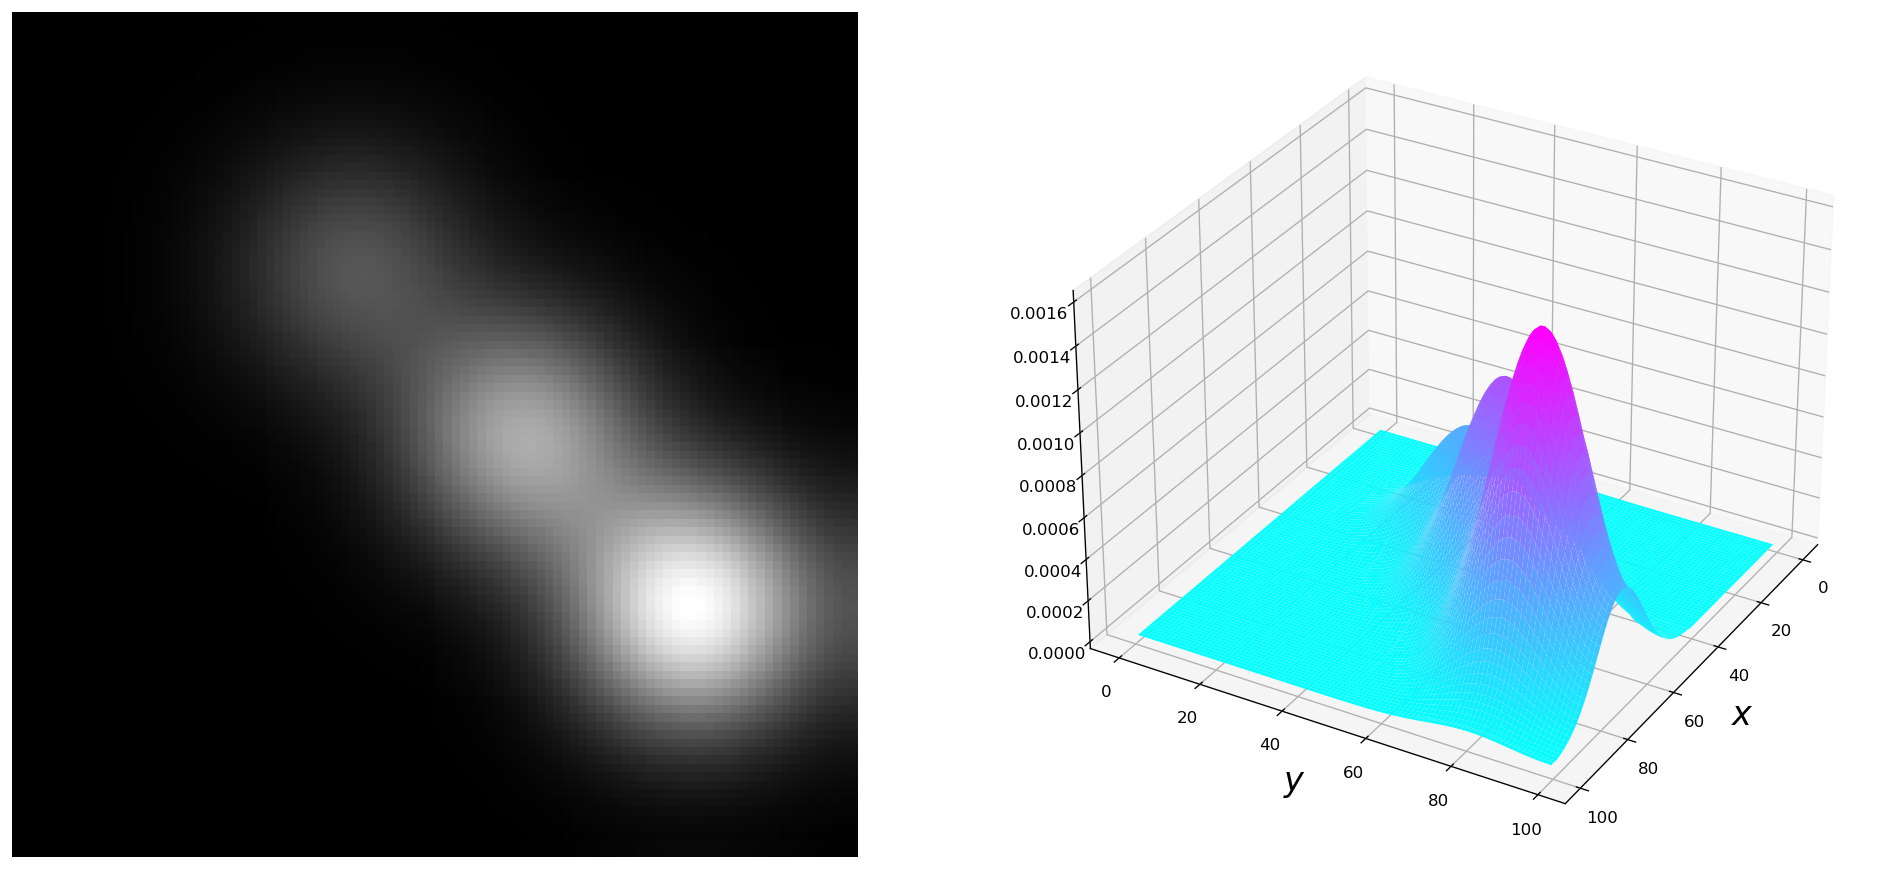

In [275]:
plot_both(responses2, "both-2.png")

In [289]:
def plot_image_with_track(responses, positions, filename):
    
    fig = plt.figure(facecolor="white", figsize=(6, 6), dpi=120)
    plt.imshow(responses, cmap='gray')
    plt.axis('off')

    x = [x for x, y in positions]
    y = [y for x, y in positions]
    plt.plot(x, y, marker='o', color='red')

    plt.savefig("./img/" + filename, bbox_inches='tight')
    plt.show()

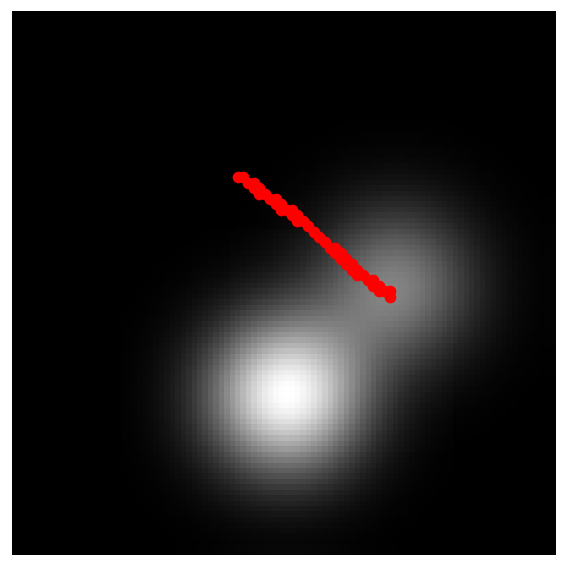

In [294]:
plot_image_with_track(responses, positions, "responses-1-with-track.png")

In [324]:
responses = generate_responses_1()
responses2 = generate_responses_2()

In [427]:
def try_different_parameters(responses):

    kernel_sizes = [(3, 3), (5, 5), (20, 20)]
    start_positions = [(50, 20), (45, 20),(40, 20)]

    fig, (ax11, ax12)= plt.subplots(1, 2, facecolor="white", figsize=(12, 12), dpi=160)
    ax11.imshow(responses, cmap='gray')
    ax11.axis('off')

    ax12.imshow(responses, cmap='gray')
    ax12.axis('off')

    color = ["#ff71ce", "#01cdfe", "#05ffa1", "#b967ff", "#fffb96"]
    for size, start, c in zip(kernel_sizes, start_positions, color):
        eps = 0.01
        ax11.add_patch(Circle(start, 1, color=c, alpha=0.4))
        ax11.add_patch(Circle(start, 2, color=c, alpha=0.3))
        position, iters, positions = mean_shift(responses, size, start, eps)
        ax11.add_patch(Circle(position, 1, color=c, alpha=0.6))
        x = [x for x, y in positions]
        y = [y for x, y in positions]
        label = "kernel size " + str(size)
        ax11.plot(x, y, color=c, markersize=5, label=label)

    start_positions = [(20, 40), (80, 80),(30, 70), (70, 30), (40, 40)]
    for start, c in zip(start_positions, color):
        eps = 0.01
        ax12.add_patch(Circle(start, 1, color=c, alpha=0.4))
        ax12.add_patch(Circle(start, 2, color=c, alpha=0.3))
        position, iters, positions = mean_shift(responses, (5, 5), start, eps)
        ax12.add_patch(Circle(position, 1, color=c, alpha=0.6))
        x = [x for x, y in positions]
        y = [y for x, y in positions]
        label = "starting position " + str(start)
        ax12.plot(x, y, color=c, markersize=5, label=label)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    ax11.legend(loc ="upper right")
    ax12.legend(loc ="upper left")
    plt.savefig("./img/parameters-1.png", bbox_inches='tight')
    plt.show()

In [455]:
def try_different_parameters_responses_2(responses2):

    fig, (ax21, ax22)= plt.subplots(1, 2, facecolor="white", figsize=(12, 6), dpi=160)
    ax21.imshow(responses2, cmap='gray')
    ax21.axis('off')

    # create the x and y coordinate arrays (here we just use pixel indices)
    xx, yy = np.mgrid[0:responses2.shape[0], 0:responses2.shape[1]]

    ax22.axis('off')
    ax22 = fig.add_subplot(1, 2, 2, projection='3d')
    ax22.set_xlabel('$x$', fontsize=20)
    ax22.set_ylabel('$y$', fontsize=20)
    ax22.plot_surface(xx, yy, responses2 ,rstride=1, cstride=1, cmap=plt.cm.cool, linewidth=10, zorder=1)
    ax22.view_init(30, 10)

    color = ["#ff71ce", "#01cdfe", "#05ffa1", "#b967ff", "#fffb96"]
    start_positions = [(20, 40), (70, 90),(80, 50), (70, 30), (40, 40)]
    for start, c in zip(start_positions, color):
        eps = 0.01
        ax21.add_patch(Circle(start, 1, color=c, alpha=0.4))
        ax21.add_patch(Circle(start, 2, color=c, alpha=0.3))
        position, iters, positions = mean_shift(responses2, (10, 10), start, eps)
        ax21.add_patch(Circle(position, 1, color=c, alpha=0.6))
        x = [x for x, y in positions]
        y = [y for x, y in positions]
        label = "starting position " + str(start)
        ax21.plot(x, y, color=c, markersize=5, label=label)

    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    ax21.legend(loc ="upper right")
    plt.savefig("./img/parameters-1-2.png", bbox_inches='tight')
    plt.show()

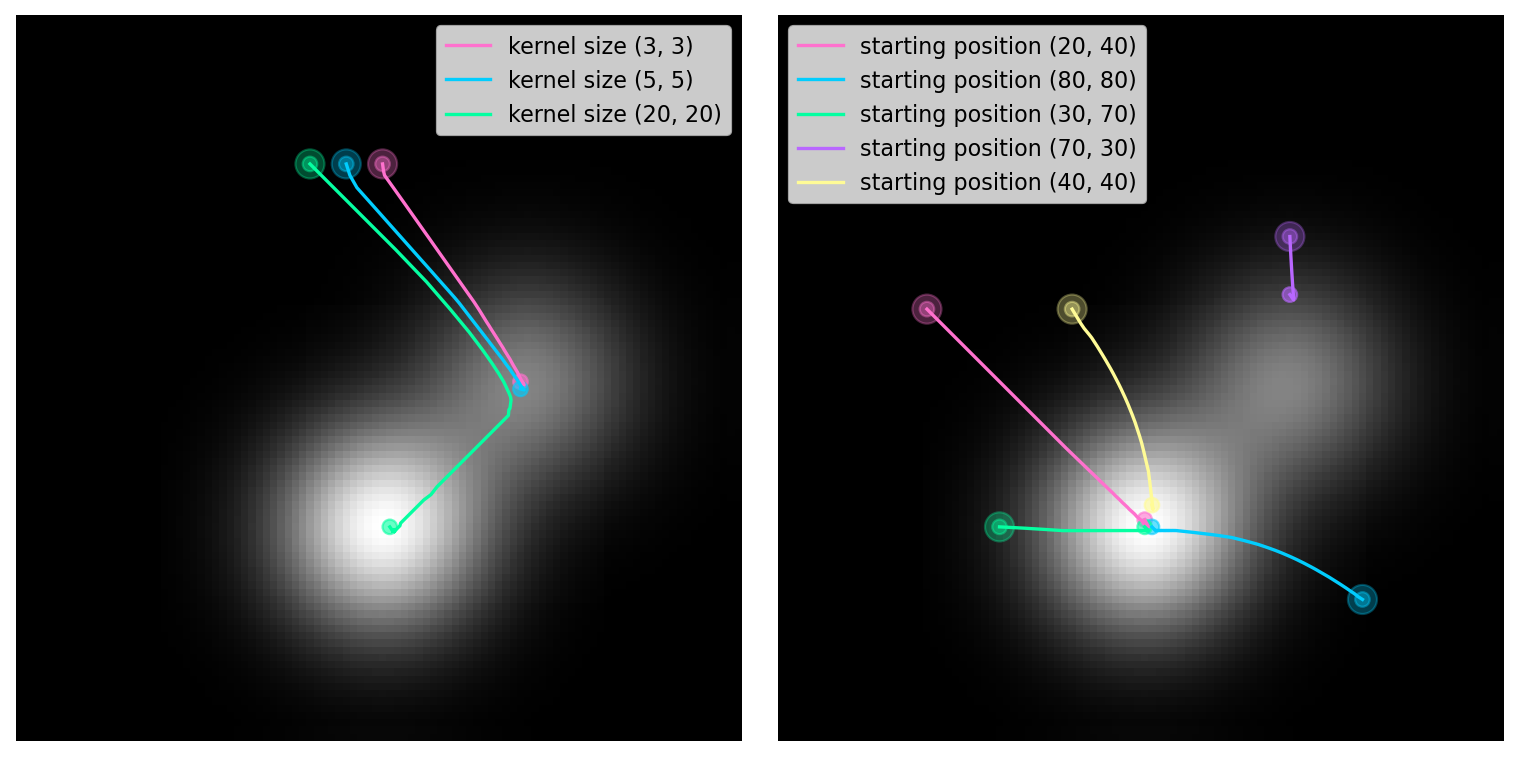

In [449]:
try_different_parameters(responses)

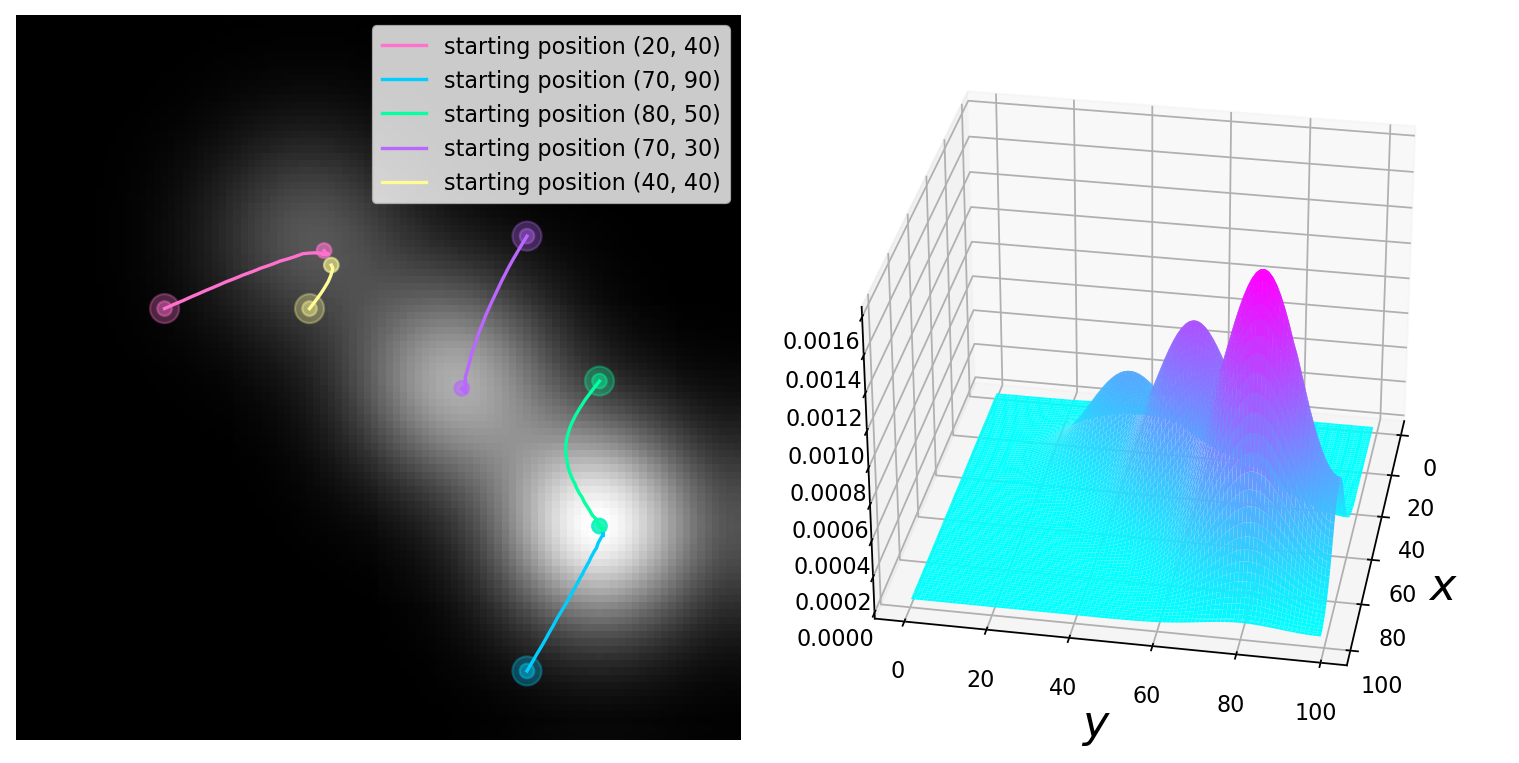

In [456]:
try_different_parameters_responses_2(responses2)

In [11]:
int(32.6)

32

In [363]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [413]:
def try_different_parameters(responses):
    sizes = [(3, 3), (5, 5), (15, 15)]

    print("Trying different sizes")
    for size in sizes:
        eps = 0.1
        starting_position = (80, 80)
        position, iters, positions = mean_shift(responses, size, starting_position, eps)
        print(position, iters)

    print("\nTrying different starting positions")
    starting_positions = [(80, 80), (30, 70), (80, 60)]
    for starting_position in starting_positions:
        eps = 0.1
        size = (5, 5)
        position, iters, positions = mean_shift(responses, size, starting_position, eps)
        print(position, iters)

    print("\nTrying different epsilon")
    epsilons = [0.1, 0.5, 0.7]
    for eps in epsilons:
        starting_position = (80, 80)
        size = (5, 5)
        position, iters, positions = mean_shift(responses, size, starting_position, eps)
        print(position, iters)

In [414]:
responses = generate_responses_1()

In [415]:
try_different_parameters(responses)

Trying different sizes
(63, 71) 157
(54, 70) 125
(51, 70) 31

Trying different starting positions
(54, 70) 125
(47, 70) 90
(73, 54) 54

Trying different epsilon
(54, 70) 125
(74, 76) 13
(78, 79) 1
